# **Project: Image Classification Using Scikit-learn**

# **Problem Statement**
You are a data-scientist of a global
company. As a data-scientist you have
to build an image classification model
to classify 2 categories of images
namely cat and dogs

# **Dataset Information**
Cats and Dogs dataset contains 1000 images out of which 500 images are of cat
and same for the dog

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import io
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [5]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
data_dir = '/content/drive/MyDrive/Cats_and_Dogs_Dataset'
os.listdir(data_dir)

['Cat500', 'Dog500']

**For loading the images we need to get their file paths. The function below is defined to collect the filepaths.**

In [7]:
categories =['Cat500', 'Dog500']
for category in categories:
  for file in os.listdir(os.path.join(data_dir,category)):
    img_path= os.path.join(data_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.109.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.108.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.11.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.101.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.100.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.10.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.107.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.102.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.104.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.106.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.103.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.105.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.1.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.135.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.136.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset

**Taking any random path of the previous output to display the image**

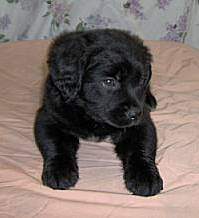

In [8]:
Image.open('/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.91.jpg')

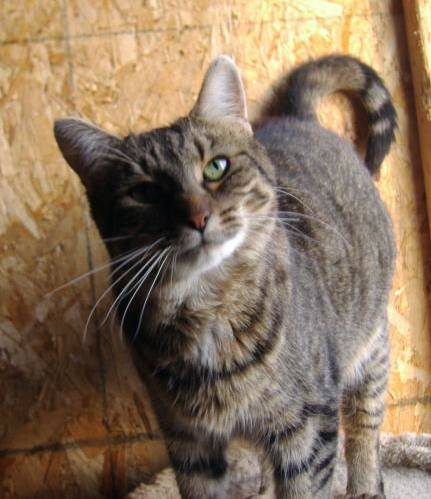

In [91]:
Image.open('/content/drive/MyDrive/Cats_and_Dogs_Dataset/Cat500/cat.21.jpg')

# Converting the image to numpy array

In [9]:
img = imread(img_path)
print(img)

[[[ 78  44  19]
  [ 78  46  23]
  [ 73  45  24]
  ...
  [210 213 218]
  [209 212 217]
  [208 211 216]]

 [[ 77  43  18]
  [ 76  44  21]
  [ 70  42  21]
  ...
  [212 215 220]
  [211 214 219]
  [210 213 218]]

 [[ 74  42  19]
  [ 73  42  21]
  [ 65  38  19]
  ...
  [213 216 221]
  [212 215 220]
  [211 214 219]]

 ...

 [[121 112  95]
  [121 112  95]
  [122 113  98]
  ...
  [ 79  35  10]
  [ 79  35  10]
  [ 79  35  10]]

 [[123 114  97]
  [123 114  97]
  [122 113  98]
  ...
  [ 80  36  11]
  [ 80  36  11]
  [ 80  36  11]]

 [[120 111  94]
  [119 110  93]
  [117 108  93]
  ...
  [ 81  37  12]
  [ 81  37  12]
  [ 81  37  12]]]


Resizing and flattening the numpy array

In [10]:
img = resize(img,(15,15,))
img

array([[[0.29706867, 0.2413401 , 0.16952279],
        [0.35260791, 0.27232499, 0.1838401 ],
        [0.42506419, 0.37088018, 0.29599424],
        [0.43663793, 0.38745226, 0.30952176],
        [0.44954735, 0.36842315, 0.27007599],
        [0.46415399, 0.36362733, 0.26447338],
        [0.50545389, 0.42837378, 0.34600253],
        [0.52712742, 0.48360889, 0.41424316],
        [0.5027816 , 0.47827756, 0.43054108],
        [0.57617905, 0.57003724, 0.55038074],
        [0.60158608, 0.60476449, 0.60108949],
        [0.70377509, 0.70980592, 0.71182301],
        [0.80310228, 0.81256043, 0.82679853],
        [0.85282917, 0.86488957, 0.88362498],
        [0.86479438, 0.87657422, 0.89615047]],

       [[0.36223801, 0.30042757, 0.21655514],
        [0.40412568, 0.33374475, 0.24232466],
        [0.46782222, 0.41616963, 0.3377816 ],
        [0.46410833, 0.39815571, 0.31729783],
        [0.42473444, 0.29198509, 0.19445742],
        [0.48096045, 0.32454983, 0.21400539],
        [0.48661426, 0.34521538,

In [11]:
img = img.flatten()
img

array([0.29706867, 0.2413401 , 0.16952279, 0.35260791, 0.27232499,
       0.1838401 , 0.42506419, 0.37088018, 0.29599424, 0.43663793,
       0.38745226, 0.30952176, 0.44954735, 0.36842315, 0.27007599,
       0.46415399, 0.36362733, 0.26447338, 0.50545389, 0.42837378,
       0.34600253, 0.52712742, 0.48360889, 0.41424316, 0.5027816 ,
       0.47827756, 0.43054108, 0.57617905, 0.57003724, 0.55038074,
       0.60158608, 0.60476449, 0.60108949, 0.70377509, 0.70980592,
       0.71182301, 0.80310228, 0.81256043, 0.82679853, 0.85282917,
       0.86488957, 0.88362498, 0.86479438, 0.87657422, 0.89615047,
       0.36223801, 0.30042757, 0.21655514, 0.40412568, 0.33374475,
       0.24232466, 0.46782222, 0.41616963, 0.3377816 , 0.46410833,
       0.39815571, 0.31729783, 0.42473444, 0.29198509, 0.19445742,
       0.48096045, 0.32454983, 0.21400539, 0.48661426, 0.34521538,
       0.23763767, 0.51955171, 0.42541318, 0.33660411, 0.4820944 ,
       0.44054225, 0.38323812, 0.57072465, 0.56090638, 0.54359

**Converting all the images into a
1-D array and storing it into data
variable. Here Label contains
two categories i.e 0 (Cat) and
1 (Dog)**

In [12]:
data = []
labels = []

In [13]:
for category_idx,category in enumerate(categories):
  for file in os.listdir(os.path.join(data_dir,category)):
    img_path = os.path.join(data_dir,category,file)
    img = imread(img_path)
    img = resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)


In [14]:
data = np.asarray(data)          # x
labels = np.asarray(labels)      # y

In [15]:
data.shape

(1000, 675)

In [16]:
labels.shape

(1000,)

# **Logistic Regression Model**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42,stratify=labels)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('Accuracy Score of LogisticRegression is',accuracy_score(y_test,y_pred)*100)

Accuracy Score of LogisticRegression is 56.49999999999999


# **Decision Tree Model**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
print('Accuracy Score of DecisionTree is',accuracy_score(y_test,y_pred1)*100)


Accuracy Score of DecisionTree is 61.5


# **Random Forest Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print('Accuracy Score of RandomForest is',accuracy_score(y_test,predictions)*100)

Accuracy Score of RandomForest is 65.0


# **Hyperparameter Tuning with Random Forest Model**

In [28]:
rfc = RandomForestClassifier(random_state=42)

In [29]:
params ={'n_estimators':[200,500,1000],'max_features':['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [32]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=rfc,param_grid=params,cv=5)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [33]:
print(grid_cv.best_score_)

0.62625


In [35]:
rfc1 = RandomForestClassifier(random_state=42,criterion='gini',max_depth= 7,max_features='auto',n_estimators=500)
rfc1.fit(x_train,y_train)
predictions1 = rfc1.predict(x_test)

In [38]:
print('Accuracy of RandomForestModel After Hyperparameter Tuning :',accuracy_score(y_test,predictions1)*100)

Accuracy of RandomForestModel After Hyperparameter Tuning : 62.0


**Creating the dataframe for actual and all predicted values**

In [39]:
error = pd.DataFrame(np.c_[y_test,y_pred,y_pred1,predictions,predictions1],
          columns =['Actual_values','LR_predictions','DT_predictions','RF_predictions','HyperparameterTuned_predictions'])
error

,Actual_values,LR_predictions,DT_predictions,RF_predictions,HyperparameterTuned_predictions
0,1,0,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,1,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
195,1,1,1,1,1
196,1,0,1,1,1
197,0,0,0,0,0
198,1,1,0,0,0


We have trained 1000 images of
cats and dogs. Increase in sample image
will lead to increase in accuracy.

THANK YOU